# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

In [62]:
import requests
import pandas as pd
import http.client
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [53]:
#Location of Berlin
L = requests.get("http://api.openweathermap.org/geo/1.0/direct?q=Berlin&limit=5&appid=b658d4211c02ef5cc3ab87ad1c933843")
w= L.json()

#Berlin Current Weather
response = requests.get("https://api.openweathermap.org/data/2.5/weather?lat=52.5170365&lon=13.3888599&exclude=hourly&units=metric&appid=b658d4211c02ef5cc3ab87ad1c933843")
Q = response.json()

In [55]:
berlin_weather_current = pd.DataFrame([Q])

# Expand nested fields
berlin_weather_current_main = berlin_weather_current['main'].apply(pd.Series)
berlin_weather_current_weather = berlin_weather_current['weather'].apply(lambda x: x[0]).apply(pd.Series)

# Concatenate the expanded dfs with the main df and dropping the original nested columns
berlin_weather_current_final = pd.concat([berlin_weather_current, berlin_weather_current_main, berlin_weather_current_weather], axis=1).drop(['main', 'weather','base','wind','clouds','dt','sys','timezone','id','pressure','humidity','sea_level','grnd_level','icon','visibility','name','cod'], axis=1)

berlin_weather_current_final.head()

,coord,temp,feels_like,temp_min,temp_max,description
0,"{'lon': 13.3889, 'lat': 52.517}",16.0,15.48,15.0,17.17,scattered clouds


### Weather forecast

In [58]:
#Forecast Weather
response1 = requests.get("https://api.openweathermap.org/data/2.5/forecast?lat=52.5170365&lon=13.3888599&exclude=hourly&units=metric&appid=b658d4211c02ef5cc3ab87ad1c933843")
Forecast = response1.json()

# Extract the list of forecasts
forecast_list = Forecast['list']

# Create a df
df = pd.DataFrame(forecast_list)

# Expand nested fields
df_main = df['main'].apply(pd.Series)
df_weather = df['weather'].apply(lambda x: x[0]).apply(pd.Series)

# Concatenate the expanded dfs with the main df and dropping the original nested columns
df_forecast = pd.concat([df, df_main, df_weather], axis=1).drop(['main', 'weather','dt','clouds','visibility','wind','sys','pressure','sea_level','grnd_level','humidity','temp_kf','id','icon'], axis=1)

df_forecast.head(5)

,pop,dt_txt,temp,feels_like,temp_min,temp_max,description
0,0,2024-10-23 15:00:00,16.00,15.48,14.84,16.00,scattered clouds
1,0,2024-10-23 18:00:00,14.91,14.31,12.72,14.91,scattered clouds
2,0,2024-10-23 21:00:00,12.86,12.16,11.29,12.86,few clouds
3,0,2024-10-24 00:00:00,10.19,9.43,10.19,10.19,clear sky
4,0,2024-10-24 03:00:00,9.17,8.34,9.17,9.17,clear sky


## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

#### Orange juice API

In [59]:
private_api_key = "5af5038f2cmsh57e6cd35f4d7007p1f68cbjsn3f2122a2613b"

params = {
    "symbols": "ORANGEJUICE",  # Commodity 
    "base": "EUR"              # Currency
}

response = requests.get(
    "https://commodities-apised.p.rapidapi.com/v1/market-data",  
    params=params, 
    headers={
        "X-RapidAPI-Host": "commodities-apised.p.rapidapi.com",
        "X-RapidAPI-Key": private_api_key  
    }
)

json_data = response.json()

# Extract rates information
if json_data['success']:
    rates = json_data['rates']['ORANGEJUICE']

    # Convert the extracted data into a DataFrame
    df = pd.DataFrame([rates])

    print("The rates are in euros per pound of orange juice:")
    print(df)
else:
    print("Error: Could not retrieve data.")
    print(json_data['errors'])


The rates are in euros per pound of orange juice:
      open     high      low     prev  current
0  4.27081  4.38137  4.24321  4.27029  4.36606


#### Events Data

In [84]:
# Calculate date range for the next month
today = datetime.now().date()
next_month = today + timedelta(days=90)
today_str = today.strftime("%Y-%m-%d")
next_month_str = next_month.strftime("%Y-%m-%d")

api_token = "a9kompRf5e_NPnPID6Hg9PeJBB9qwaZZTmMAJ0jO"

# Creating events formula for pagins
def get_events(api_token, start_date, end_date, max_results=1000):
    url = "https://api.predicthq.com/v1/events/"
    headers = {
        "Authorization": f"Bearer {api_token}",
        "Accept": "application/json"
    }
    params = {
        "categories": "community, festivals, sports",
        "saved_location.location_id": "N333B4M3T98yr-3FQ3nIHw",
        "phq_attendance.gte": "500", # Avoid minor events which would not be profitable for us
        "active.gte": start_date,
        "active.lte": end_date,
        "limit": 100  # Maximum allowed by the API
    }

    all_events = []
    while len(all_events) < max_results:
        response = requests.get(url, headers=headers, params=params)
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            print(response.text)
            break

        data = response.json()
        events = data['results']
        all_events.extend(events)

        if not data['next']:
            break  # No more pages

        params['offset'] = data['next'].split('offset=')[1].split('&')[0]

    return all_events[:max_results]

In [85]:
# Get events into dataframe
events = get_events(api_token, today_str, next_month_str)
berlin_events = pd.DataFrame(events)

In [86]:
# Create table with relevant variables
events_summary = berlin_events[["title", "category", "labels", "phq_attendance", "predicted_event_spend", "start_local", "predicted_end_local", "location"]]
events_summary = events_summary.copy()

# Create new columns for start date and time + convert data type
events_summary.loc[:, "date"] = events_summary["start_local"].str.split('T').str[0]
events_summary.loc[:, "start_time"] = events_summary["start_local"].str.split('T').str[1]
events_summary["date"] = pd.to_datetime(events_summary["date"], format="%Y-%m-%d")

# Create new columns for end date and time + convert data type
events_summary.loc[:, "end_date"] = events_summary['predicted_end_local'].str.split('T').str[0]
events_summary.loc[:, "end_time"] = events_summary['predicted_end_local'].str.split('T').str[1]
events_summary["end_date"] = pd.to_datetime(events_summary["end_date"], format="%Y-%m-%d")

# Ensure 'start_time' is converted to string
events_summary["start_time"] = events_summary["start_time"].astype(str)

# Create the 'time_day' column based on the condition
events_summary["time_day"] = np.where(
    (events_summary["start_time"].str[:2].astype(int) >= 6) & 
    (events_summary["start_time"].str[:2].astype(int) <= 18),
    "noon", 
    "night"
)

events_summary.head(5)

,title,category,labels,phq_attendance,predicted_event_spend,start_local,predicted_end_local,location,date,start_time,end_date,end_time,time_day
0,Aynur Dogan,concerts,"[concert, music]",1756,55921,2025-01-20T20:00:00,2025-01-21T00:10:00,"[13.3883474, 52.5207127]",2025-01-20,20:00:00,2025-01-21,00:10:00,night
1,jpegmafia,concerts,"[concert, music]",1926,61335,2025-01-20T20:00:00,2025-01-21T00:30:00,"[13.421503, 52.486301]",2025-01-20,20:00:00,2025-01-21,00:30:00,night
2,Die Schöne und das Biest - Die große Jubiläums...,performing-arts,"[entertainment, music, performing-arts]",748,21550,2025-01-20T19:30:00,2025-01-20T21:40:00,"[13.372268, 52.50757]",2025-01-20,19:30:00,2025-01-20,21:40:00,night
3,EarthGang,concerts,"[concert, music]",732,23311,2025-01-19T20:00:00,2025-01-20T00:30:00,"[13.3877258, 52.495972]",2025-01-19,20:00:00,2025-01-20,00:30:00,night
4,DIE NEUE HEINZ ERHARDT REVUE,concerts,"[concert, music]",1777,56590,2025-01-19T19:00:00,2025-01-19T22:40:00,"[13.372268, 52.50757]",2025-01-19,19:00:00,2025-01-19,22:40:00,night


## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

#### The average temp daily for the forecast

In [65]:
df_forecast['dt_txt'] = df_forecast['dt_txt'].astype(str)
df_forecast['dt_txt'] = pd.to_datetime(df_forecast['dt_txt'], errors='coerce')

df_forecast['date'] = df_forecast['dt_txt'].dt.date  # Extract the date part
print(df_forecast.head(5))

   pop              dt_txt   temp  feels_like  temp_min  temp_max  \
0    0 2024-10-23 15:00:00  16.00       15.48     14.84     16.00   
1    0 2024-10-23 18:00:00  14.91       14.31     12.72     14.91   
2    0 2024-10-23 21:00:00  12.86       12.16     11.29     12.86   
3    0 2024-10-24 00:00:00  10.19        9.43     10.19     10.19   
4    0 2024-10-24 03:00:00   9.17        8.34      9.17      9.17   

        description        date  
0  scattered clouds  2024-10-23  
1  scattered clouds  2024-10-23  
2        few clouds  2024-10-23  
3         clear sky  2024-10-24  
4         clear sky  2024-10-24  


Reduce the daily temperatures from every 3 hours to day and night

In [72]:
df_forecast['dt_txt'] = pd.to_datetime(df_forecast['dt_txt'])

# Create new columns for day and night temperature
df_forecast['date'] = df_forecast['dt_txt'].dt.date  # Extract the date part for grouping
df_forecast['time'] = df_forecast['dt_txt'].dt.time  # Extract the time part

# Define the time ranges for day and night
day_start = pd.to_datetime('09:00:00').time()
day_end = pd.to_datetime('18:00:00').time()
night_start = pd.to_datetime('18:00:00').time()
night_end = pd.to_datetime('00:00:00').time()

# Filter for day temperatures
day_tem = df_forecast[(df_forecast['time'] >= day_start) & (df_forecast['time'] <= day_end)].groupby('date')['temp'].mean().reset_index()
day_tem.rename(columns={'temp': 'day_tem'}, inplace=True)

# Filter for night temperatures
night_tem = df_forecast[(df_forecast['time'] >= night_start) | (df_forecast['time'] < night_end)].groupby('date')['temp'].mean().reset_index()
night_tem.rename(columns={'temp': 'night_tem'}, inplace=True)

# Merge the two new dfs back into the original df
df_weather_forecast = pd.merge(df_forecast[['date']].drop_duplicates(), day_tem, on='date', how='left')
df_weather_forecast = pd.merge(df_weather_forecast, night_tem, on='date', how='left')

print(df_weather_forecast)

         date  day_tem  night_tem
0  2024-10-23  15.4550     13.885
1  2024-10-24  14.0875     12.210
2  2024-10-25  15.7800     13.985
3  2024-10-26  16.2650     14.330
4  2024-10-27  16.2325     14.205
5  2024-10-28  13.7850        NaN


To determine quality, we assigned to each temperature interval a score form 0 to 1 indicating how good the weather is and how impactful it will be on the sales.

If the weather is below 10°C, quality = 0.

If the weather is between 10°C and 15°C, quality = 0.4.

If the weather is between 15°C and 20°C, quality = 0.7.

If the weather is between 20°C and 25°C, quality = 0.85.

If the weather is above 25°C, quality = 1.

In [74]:
def determine_quality(temp):
    if pd.isna(temp):  # Handle NaN values
        return None
    elif temp < 10:
        return 0
    elif 10 <= temp < 15:
        return 0.4
    elif 15 <= temp < 20:
        return 0.7
    elif 20 <= temp < 25:
        return 0.85
    else:
        return 1

# Apply the function to both day_tem and night_tem to create the quality column
df_weather_forecast['quality_day'] = df_weather_forecast['day_tem'].apply(determine_quality)
df_weather_forecast['quality_night'] = df_weather_forecast['night_tem'].apply(determine_quality)

print(df_weather_forecast[['date', 'day_tem', 'night_tem', 'quality_day', 'quality_night']])

         date  day_tem  night_tem  quality_day  quality_night
0  2024-10-23  15.4550     13.885          0.7            0.4
1  2024-10-24  14.0875     12.210          0.4            0.4
2  2024-10-25  15.7800     13.985          0.7            0.4
3  2024-10-26  16.2650     14.330          0.7            0.4
4  2024-10-27  16.2325     14.205          0.7            0.4
5  2024-10-28  13.7850        NaN          0.4            NaN


### Weather and Event Dataframe

Now, we can merge the event and weather forecast dfs.

In [87]:
events_summary['date'] = pd.to_datetime(events_summary['date'])
df_weather_forecast['date'] = pd.to_datetime(df_weather_forecast['date'])

# Merge
weather_and_event = events_summary.merge(df_weather_forecast, how="inner", left_on="date", right_on="date")

weather_and_event_final = weather_and_event[['title','category','phq_attendance','date','time_day','day_tem','night_tem','quality_day','quality_night']]
weather_and_event_final.head(5)

,title,category,phq_attendance,date,time_day,day_tem,night_tem,quality_day,quality_night
0,PARTYNEXTDOOR,concerts,2281,2024-10-28,night,13.7850,NaN,0.4,NaN
1,WET - Europe,festivals,700,2024-10-28,night,13.7850,NaN,0.4,NaN
2,"Georgian National Ballet ""Sukhishvili""",performing-arts,748,2024-10-28,night,13.7850,NaN,0.4,NaN
3,Matija,concerts,500,2024-10-27,night,16.2325,14.205,0.7,0.4
4,STRFKR,concerts,724,2024-10-27,night,16.2325,14.205,0.7,0.4


We create a column quality to have the quality of the weather during the event according to the time the event takes place

In [88]:
weather_and_event_final['quality'] = np.where(weather_and_event_final['time_day'] == 'day', weather_and_event_final['quality_day'], weather_and_event_final['quality_night'])
weather_and_event_final.head(5)

C:\Users\armel\AppData\Local\Temp\ipykernel_27356\1997963920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_and_event_final['quality'] = np.where(weather_and_event_final['time_day'] == 'day', weather_and_event_final['quality_day'], weather_and_event_final['quality_night'])


,title,category,phq_attendance,date,time_day,day_tem,night_tem,quality_day,quality_night,quality
0,PARTYNEXTDOOR,concerts,2281,2024-10-28,night,13.7850,NaN,0.4,NaN,NaN
1,WET - Europe,festivals,700,2024-10-28,night,13.7850,NaN,0.4,NaN,NaN
2,"Georgian National Ballet ""Sukhishvili""",performing-arts,748,2024-10-28,night,13.7850,NaN,0.4,NaN,NaN
3,Matija,concerts,500,2024-10-27,night,16.2325,14.205,0.7,0.4,0.4
4,STRFKR,concerts,724,2024-10-27,night,16.2325,14.205,0.7,0.4,0.4


## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


We want to compute the expected quantity sold for each event in the following days. We base the statistic on the attendance, the demand and the quality of the weather.

**Quantity sold = Attendance * Demand * Quality**

The demand is the percentage of people that buy orange juice. After a thourough market research, we found that it is 20%.

In [90]:
weather_and_event_final['quantity_sold'] = weather_and_event_final['phq_attendance']* 0.2 *weather_and_event_final['quality']
weather_and_event_final.head(5)

C:\Users\armel\AppData\Local\Temp\ipykernel_27356\2909280759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_and_event_final['quantity_sold'] = weather_and_event_final['phq_attendance']* 0.2 *weather_and_event_final['quality']


,title,category,phq_attendance,date,time_day,day_tem,night_tem,quality_day,quality_night,quality,quantity_sold
0,PARTYNEXTDOOR,concerts,2281,2024-10-28,night,13.7850,NaN,0.4,NaN,NaN,NaN
1,WET - Europe,festivals,700,2024-10-28,night,13.7850,NaN,0.4,NaN,NaN,NaN
2,"Georgian National Ballet ""Sukhishvili""",performing-arts,748,2024-10-28,night,13.7850,NaN,0.4,NaN,NaN,NaN
3,Matija,concerts,500,2024-10-27,night,16.2325,14.205,0.7,0.4,0.4,40.00
4,STRFKR,concerts,724,2024-10-27,night,16.2325,14.205,0.7,0.4,0.4,57.92


## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

We ploted the temperature for day and night for each date.

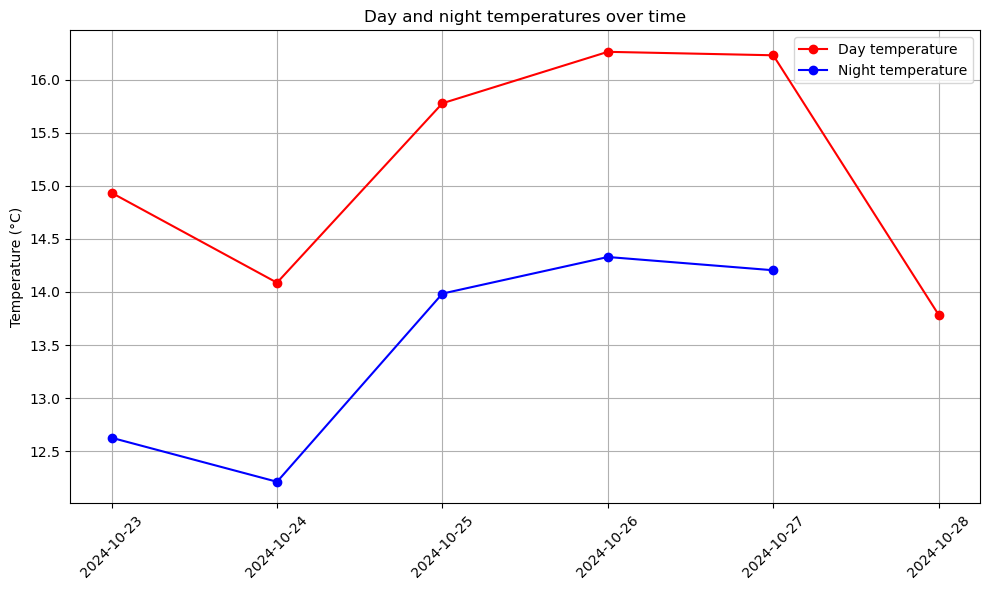

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['date'], final_df['noon_tem'], marker='o', label='Day temperature', color='red')
plt.plot(final_df['date'], final_df['night_tem'], marker='o', label='Night temperature', color='blue')

# Titles and labels
plt.title('Day and night temperatures over time')
plt.xlabel('')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

We ploted the expected quantity sold per event in the following days.

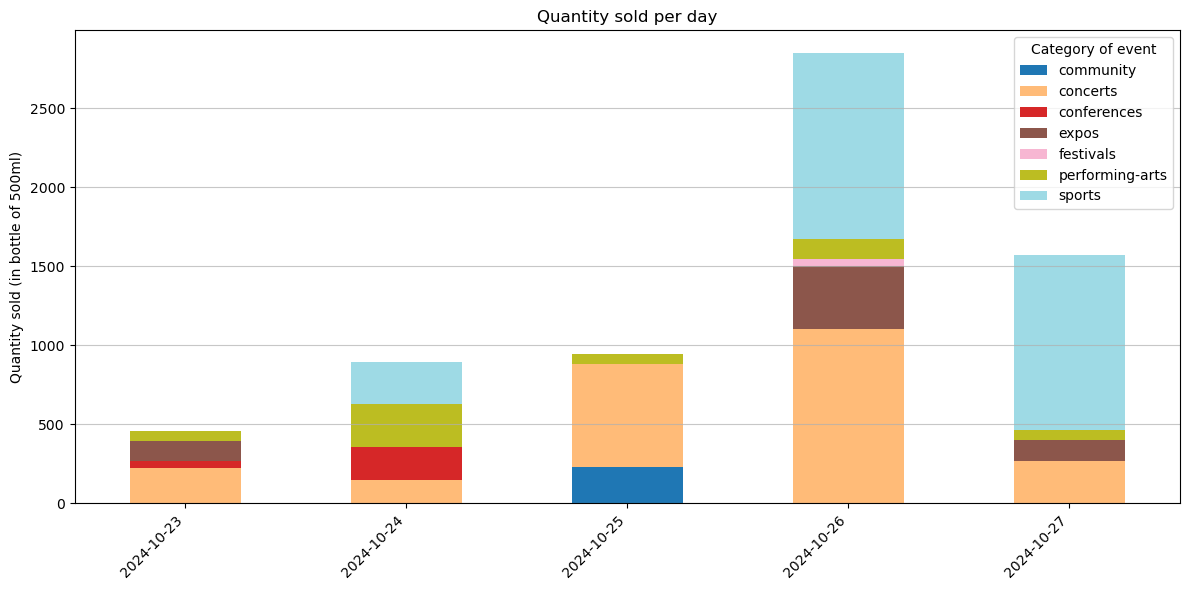

In [99]:
weather_and_event_final = weather_and_event_final.copy()

# Drop the row if we do not have the quantity sold
weather_and_event_final = weather_and_event_final.dropna(subset=['quantity_sold'])

# Group by date and title, then sum quantity_sold
quantity_per_day_per_event = weather_and_event_final.groupby(['date', 'category'])['quantity_sold'].sum().reset_index()

# Pivot the data
pivot_data = quantity_per_day_per_event.pivot(index='date', columns='category', values='quantity_sold').fillna(0)

# Stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

plt.title('Quantity sold per day')
plt.xlabel('')
plt.ylabel('Quantity sold (in bottle of 500ml)')

# Format x-axis dates
x_labels = [d.strftime('%Y-%m-%d') for d in pivot_data.index]
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')

plt.legend(title='Category of event')

plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!